In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
from os.path import isdir, isfile
import pandas as pd

from numpy.random import default_rng
from pathlib import Path
import scipy.ndimage as ndimage
import torch
import lampe
import zuko
import torchvision.transforms as T
import torchvision.transforms.functional as F


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import h5py
import numpy as np

from bisect import bisect
from numpy import ndarray as Array
from pathlib import Path
from torch import Tensor, Size
from torch.distributions import Distribution
from torch.utils.data import DataLoader, Dataset, IterableDataset
from tqdm import tqdm
from typing import *

from corner import corner

%load_ext autoreload
%autoreload 2

['Planet_train1', 'Planet_train10', 'Planet_train100']


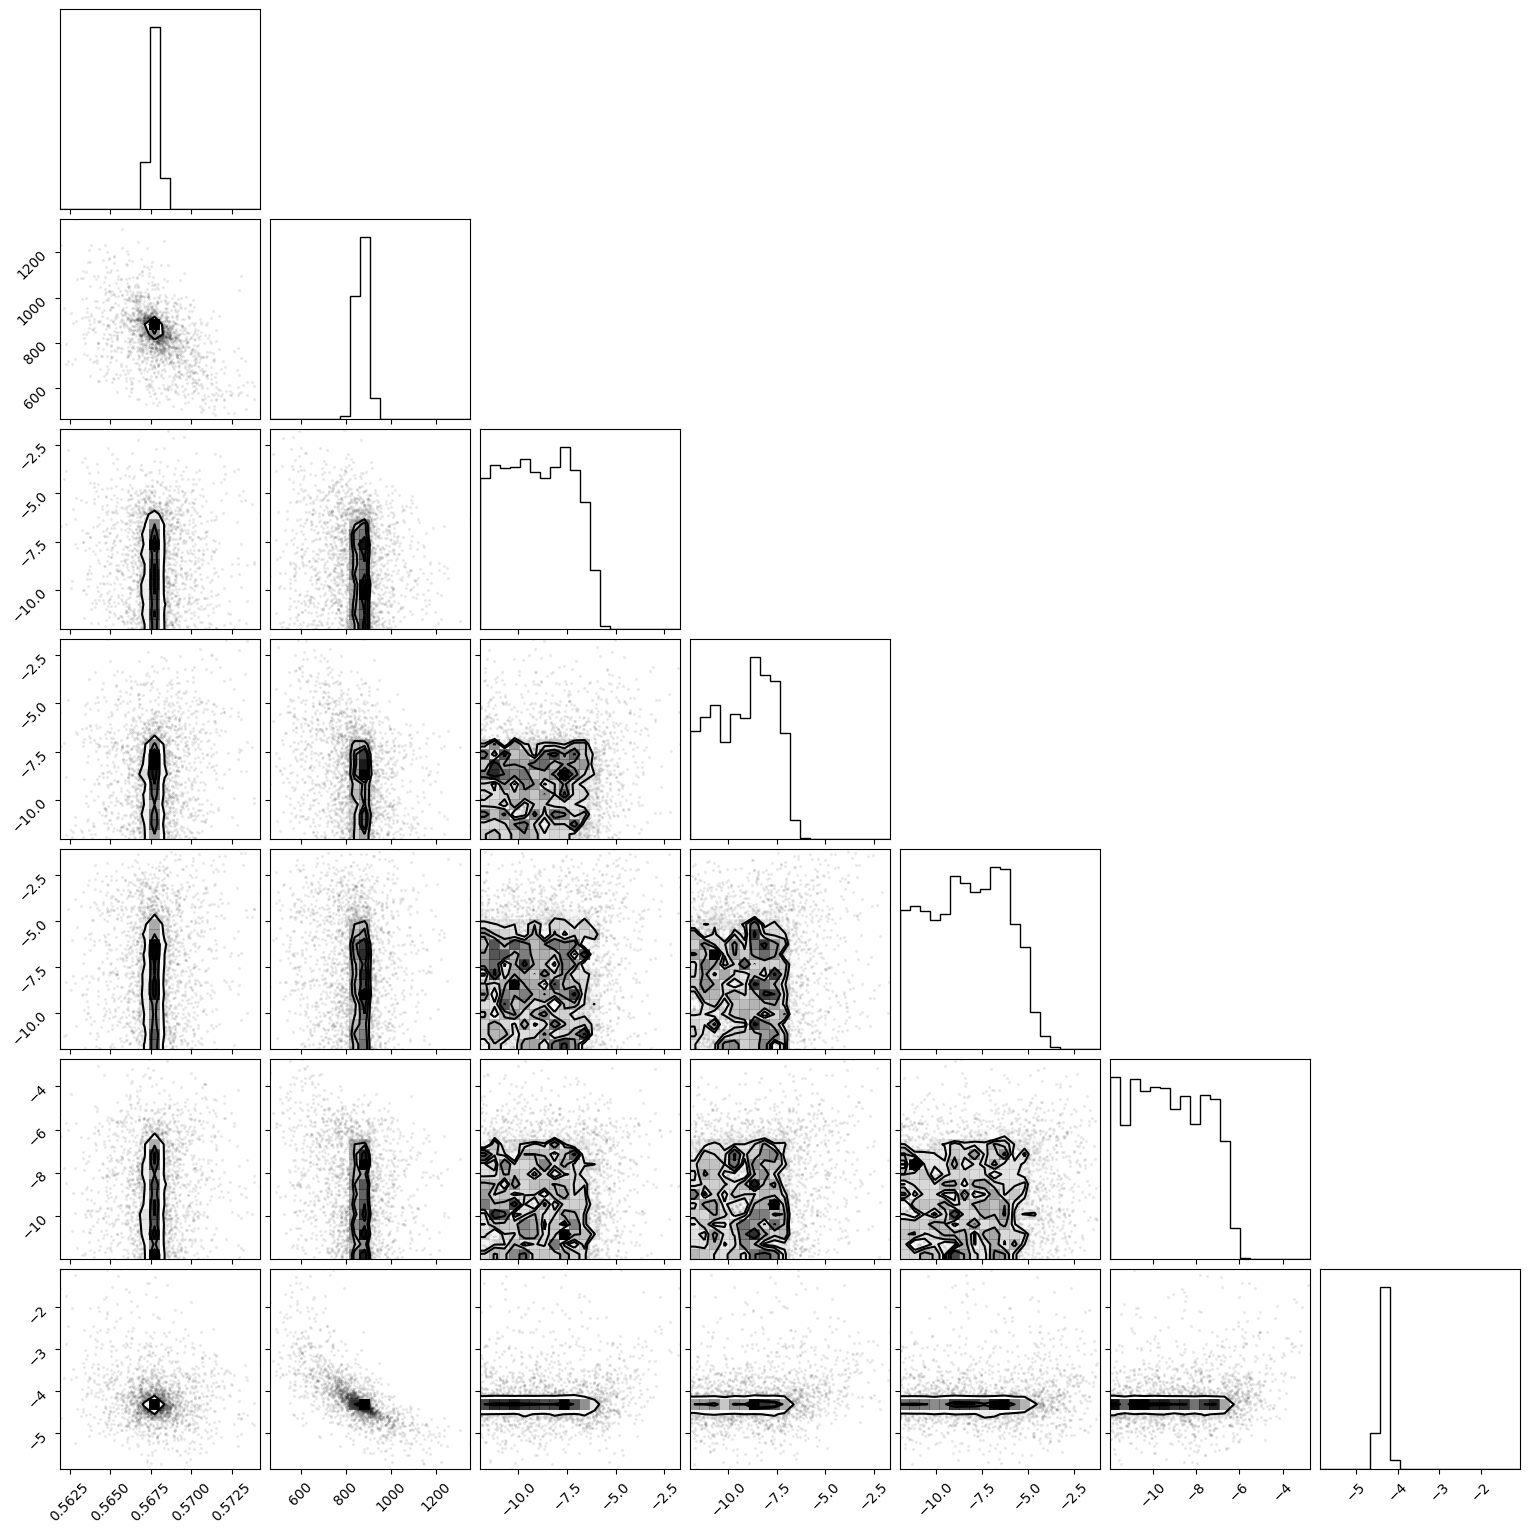

In [5]:
# EXAMPLE TRACES
%matplotlib inline
infile     = h5py.File('/home/lwelzel/Documents/git/maldcope/data/TrainingData/Ground Truth Package/Tracedata.hdf5')           ### loading in tracedata.hdf5
planetlist = [p for p in infile.keys()]            ### getting list of planets in file
trace      = infile[planetlist[0]]['tracedata'][:] ### accessing Nested Sampling trace data
weights    = infile[planetlist[0]]['weights'][:]   ### accessing Nested Sampling weight data

print(planetlist[:3])

fig = corner(
    trace,
    weights=weights
)
plt.show()

['Planet_0', 'Planet_1', 'Planet_10']


ValueError: It looks like the parameter(s) in column(s) 0, 1, 2, 3, 4, 5, 6 have no dynamic range. Please provide a `range` argument.

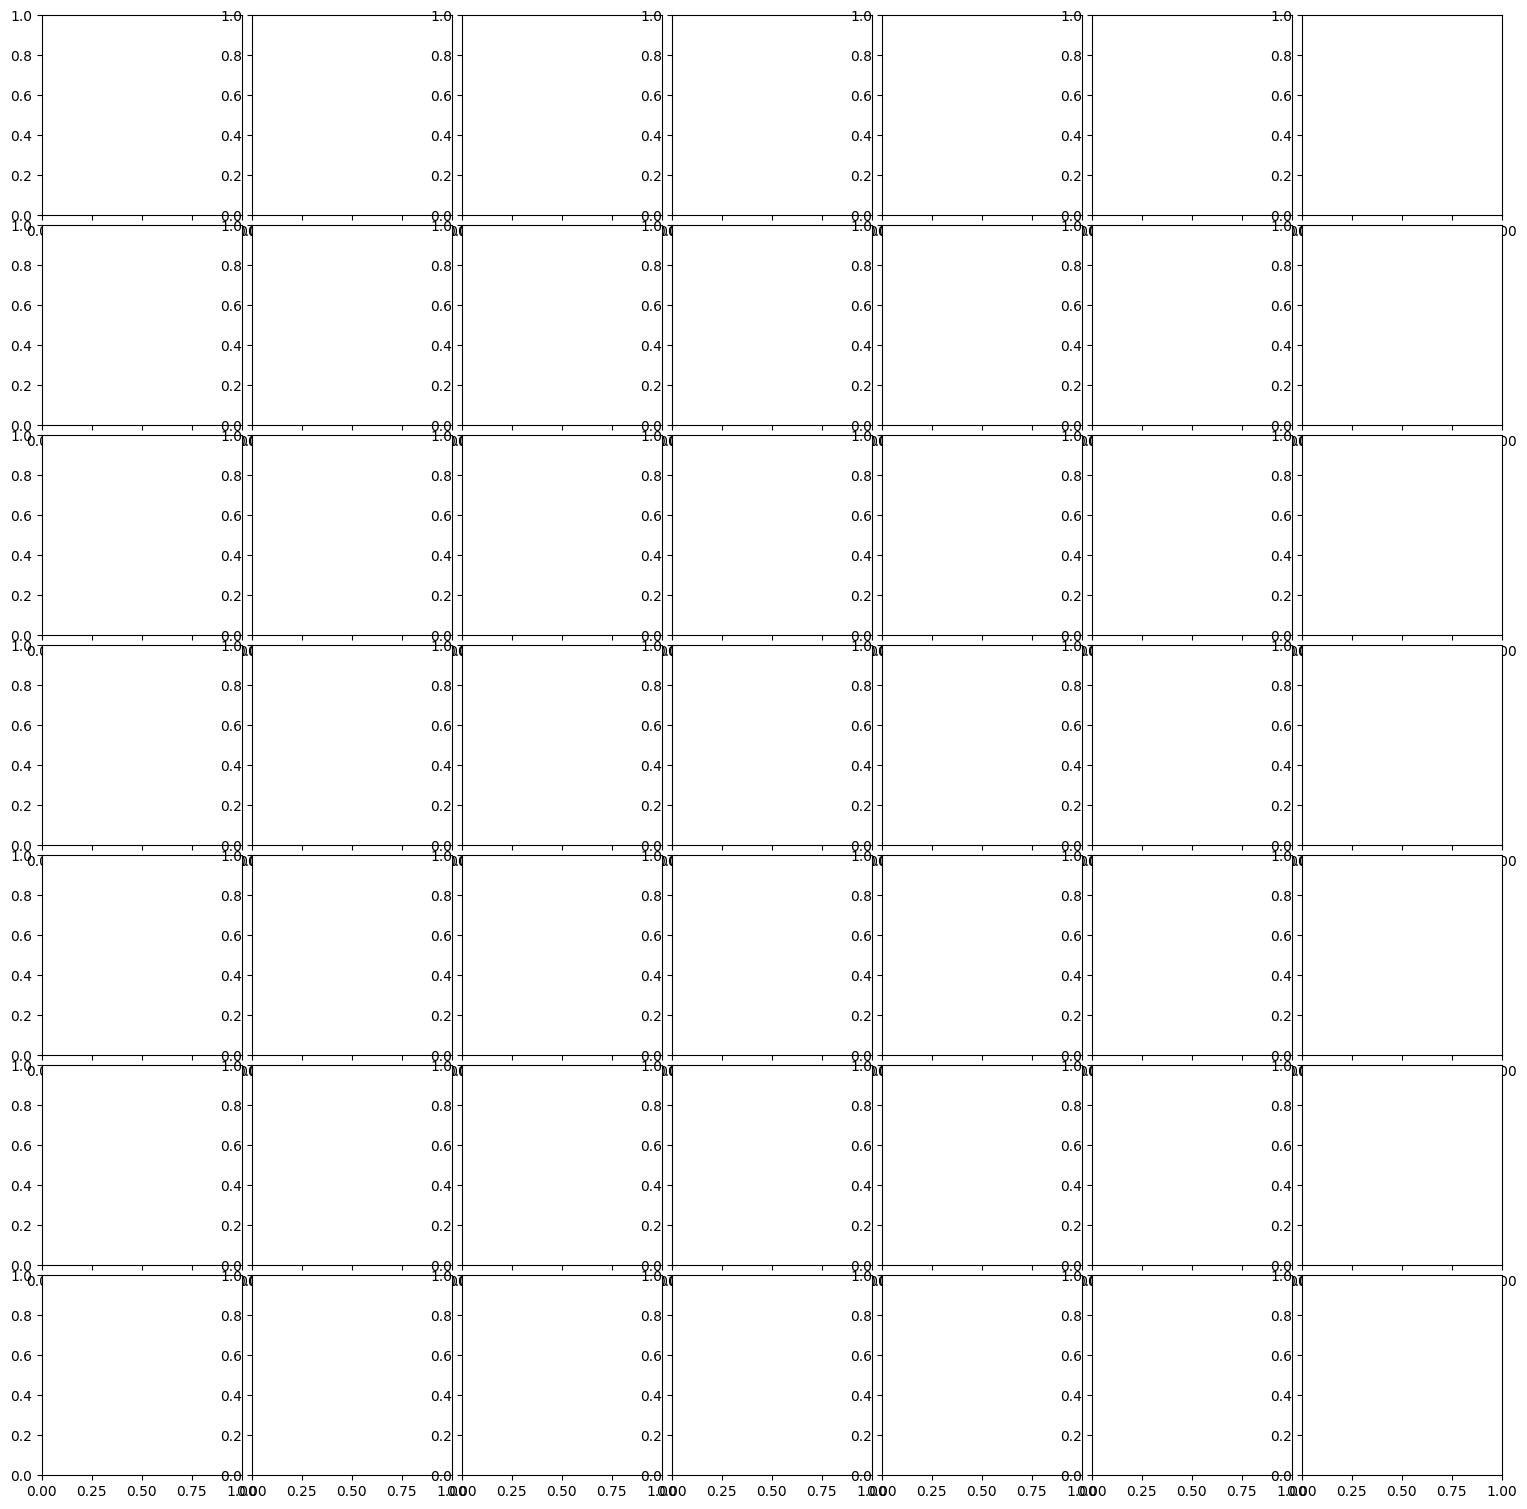

In [7]:
# COMPETITION OUTPUT TRACES
%matplotlib inline
infile     = h5py.File('/home/lwelzel/Documents/git/maldcope/data/TestData/RT_submission.hdf5')           ### loading in tracedata.hdf5
planetlist = [p for p in infile.keys()]            ### getting list of planets in file
trace      = infile[planetlist[0]]['tracedata'][:] ### accessing Nested Sampling trace data
weights    = infile[planetlist[0]]['weights'][:]   ### accessing Nested Sampling weight data

print(planetlist[:3])

fig = corner(
    trace,
    weights=weights
)
plt.show()



In [8]:
infile.close()